# **EXPERIMENT 2.3 and 2.4**

# To build a Naive Bayes' model for predicting the quality of the car given few of other car attributes.

**By:  Jasleen Minhas**

**UID: 20BCS6897**

## **Step 1. Import necessary libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics , model_selection
## Import the Classifier.
from sklearn.naive_bayes import GaussianNB

## **Step 2. Load the data set and understanding it**

Dataset link: https://www.kaggle.com/code/bearwithme088/car-evaluation-py/data

In [2]:
data = pd.read_csv('car_evaluation.csv' ,names=['buying','maint','doors','persons','lug_boot','safety','class'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


The train dataset has 1728 rows and 7 columns.

In [4]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

There are no missing values in the dataset.

## **Step 3. Identify the target variable**

In [5]:
#visualisation
#histogram
class_def=[]
for row in data['class']:
    if row =='unacc':
        class_def.append('unacceptable')
    elif row == 'acc':
        class_def.append('acceptable')
    elif row == 'good':
        class_def.append('good')
    elif row == 'vgood':
        class_def.append('very good')
    else:
        class_def.append('Failed')
data['class_def'] = class_def
car_count=pd.value_counts(data['class_def'].values, sort=False)
print(car_count)


unacceptable    1210
acceptable       384
very good         65
good              69
dtype: int64


### Visualizing the dataset 

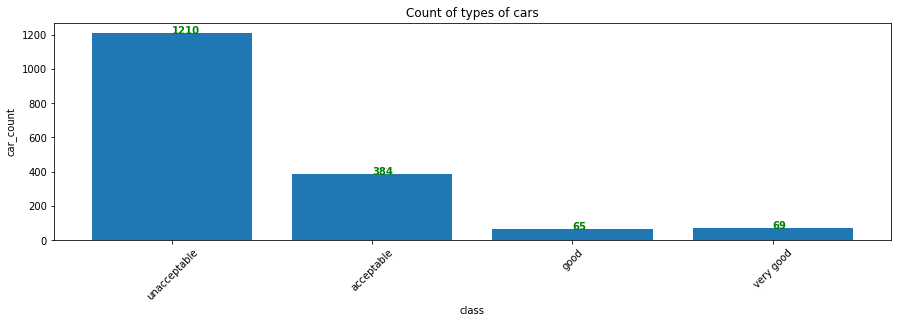

In [6]:
Index = [1,2,3,4]
plt.figure(figsize=(15,4))
plt.bar(Index,car_count,color = 'blue')
plt.xticks(Index,['unacceptable','acceptable','good','very good'],rotation=45)
plt.ylabel('car_count')
plt.xlabel('class')
plt.title('Count of types of cars')
plt.bar(Index, car_count)
for a,b in zip(Index, car_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')
plt.show()

### Encoding the class variable

In [7]:
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [8]:
data.drop('class', axis = 1, inplace=True)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class_def
0,vhigh,vhigh,2,2,small,low,unacceptable
1,vhigh,vhigh,2,2,small,med,unacceptable
2,vhigh,vhigh,2,2,small,high,unacceptable
3,vhigh,vhigh,2,2,med,low,unacceptable
4,vhigh,vhigh,2,2,med,med,unacceptable


In [9]:
# Encoding
cleanup_nums = {"class_def": {'unacceptable':4,'acceptable':3,'good':2,'very good':1 }}
data.replace(cleanup_nums,inplace = True)

The values have been encoded into 4 different numeric labels.

## **Step 4. Identify the predictor variables and encode any string variables to equivalent integer codes**

The target variable is marked as a class in the data frame. The values are present in string format. However, the algorithm requires the variables to be coded into its equivalent integer codes. We can convert the string categorical values into an integer code using factorize method of the pandas library.

In [10]:
# data['class'],class_names = pd.factorize(data['class'])
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class_def
0,0,0,0,0,0,0,4
1,0,0,0,0,0,1,4
2,0,0,0,0,0,2,4
3,0,0,0,0,1,0,4
4,0,0,0,0,1,1,4


## Correlation matrix

In [11]:
corrMatrix = data.corr()
print (corrMatrix)

                 buying         maint         doors       persons  \
buying     1.000000e+00 -1.163678e-15  2.288293e-16  1.856658e-16   
maint     -1.163678e-15  1.000000e+00  2.744718e-16  3.702055e-17   
doors      2.288293e-16  2.744718e-16  1.000000e+00  1.956599e-17   
persons    1.856658e-16  3.702055e-17  1.956599e-17  1.000000e+00   
lug_boot   1.147215e-16 -9.445167e-17 -2.674488e-18 -9.251859e-18   
safety     4.113082e-16  7.812321e-17  3.406454e-17  1.137208e-17   
class_def -2.827504e-01 -2.324215e-01 -6.605665e-02 -3.417068e-01   

               lug_boot        safety  class_def  
buying     1.147215e-16  4.113082e-16  -0.282750  
maint     -9.445167e-17  7.812321e-17  -0.232422  
doors     -2.674488e-18  3.406454e-17  -0.066057  
persons   -9.251859e-18  1.137208e-17  -0.341707  
lug_boot   1.000000e+00  1.927471e-18  -0.157932  
safety     1.927471e-18  1.000000e+00  -0.439337  
class_def -1.579317e-01 -4.393373e-01   1.000000  


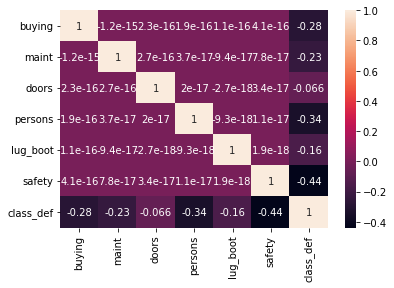

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

No such straight corelation with any feature, therefore using all the features in the model

## **Step 5. Select the predictor feature and the target variable**


In [13]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [14]:
X

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
1723,3,3,3,2,1,1
1724,3,3,3,2,1,2
1725,3,3,3,2,2,0
1726,3,3,3,2,2,1


In [15]:
y.name

'class_def'

## **Step 6. Train test split:**

In [16]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=80)

### Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

## **Step 7. Training/model fitting:**

In [18]:
model = GaussianNB()
## Fit the model on the training data.
model.fit(X_train, y_train)

GaussianNB()

## **Step 8. Model parameters study:**

In [19]:
# use the model to make predictions with the train data
y_pred_train = model.predict(X_train)

# use the model to make predictions with the test data
y_pred_test = model.predict(X_test)

### Training dataset performance

In [20]:
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
print('Accuracy of trainig data set: {:.2f}'.format(accuracy_train))

Accuracy of trainig data set: 0.70


In [21]:
count_misclassified_train = (y_train != y_pred_train).sum()
print('Misclassified training samples: {}'.format(count_misclassified_train))

Misclassified training samples: 368


### Testing dataset performance

In [22]:
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print('Accuracy of testing data set: {:.2f}'.format(accuracy_test))

Accuracy of testing data set: 0.67


In [23]:
count_misclassified_test = (y_test != y_pred_test).sum()
print('Misclassified testing samples: {}'.format(count_misclassified_test))

Misclassified testing samples: 170


# **Conclusion:**
    1. Accuracy of trainig data set: 0.70
    2. Misclassified training samples: 368
    3. Accuracy of testing data set: 0.67
    4. Misclassified testing samples: 170
        